In [1]:
# Install required module (if not exists)
#!pip3 install pandas
#!pip3 install scikit-learn

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import pandas as pd
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Set random seed for numpy and sklearn (scikit-learn)
np.random.seed(0)

# It will make your graph more fancy
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 11.5

# **Datascience Lab 14**

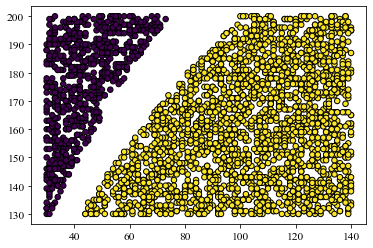

X shape is  (3000, 2) Y shape is  (3000,)


In [3]:
def bmi_generator():
    while True:
        weight = random.randint(30, 140)
        height = random.randint(130, 200)
        bmi = weight / (height/100) ** 2
        if bmi<18.5:
            y = 0 # thin
        elif bmi>=25:
            y = 1 # fat
        else:
            continue # normal
        yield [weight, height], y
    
X = []
Y = []

bmi_gen = bmi_generator()

for i in range(3000):
    x, y = next(bmi_gen)
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

bmi_map = {0: 'thin', 1: 'fat'}

plt.scatter(X[:,0], X[:,1],c= Y, s=30, edgecolors= 'black')
plt.show()
print('X shape is ', X.shape, 'Y shape is ', Y.shape)


## Lab 14-1: kmeans (4 points)
- Do kmeans clustering. Compare the graphs according to the number of clusters (3 vs 4). Set the `random_state` as 0
- Paint in 'b', 'y', 'm', 'g' to the order on the label.
- Set the center point size to 100 and color to red
- Set the edgecolor to black
- You have to subplot two graphs

### Hint
- `cluster_centers`
- `labels_`
- `KMeans`

### Reference
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

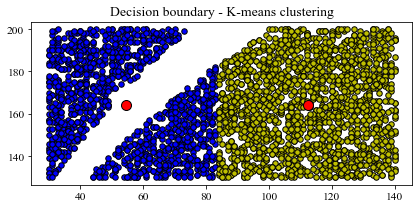

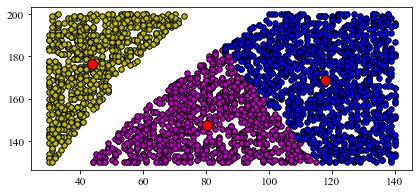

In [4]:
### -------- LAB 14-1 START -------- ###

color = {0 : 'b', 1: 'y', 2: 'm'}

# do Kmeans
# fit model, for compared kmeans between n_clusters
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
kmeans2 = KMeans(n_clusters=3,random_state=0).fit(X)

# set the colormap
colors1 = {0: 'b', 1: 'y'}
colors2 = {0 : 'b', 1: 'y', 2: 'm'}

# find the center of each cluster
centers1 = kmeans.cluster_centers_
centers2= kmeans2.cluster_centers_

# Plot the graph 

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
for i in range(len(X)):
    plt.scatter(X[i,0], X[i,1], s=30,c=colors1[kmeans.labels_[i]],edgecolors= 'black')
plt.scatter(centers1[:,0],centers1[:,1],color='r', s = 100, edgecolor='black')
plt.title('Decision boundary - K-means clustering')

plt.figure(figsize=(15,3))
plt.subplot(1,2,2)
for i in range(len(X)):
    plt.scatter(X[i,0], X[i,1], s=30,c=colors2[kmeans2.labels_[i]],edgecolors= 'black')
plt.scatter(centers2[:,0],centers2[:,1], color = 'r', s= 100, edgecolor='black')

plt.show()

### --------- LAB 14-1 END --------- ###

### Evaluation code

In [5]:
print('The rand_score is',rand_score(Y, kmeans.predict(X)))
print('Adjusted rand score is', adjusted_rand_score(Y, kmeans.predict(X)))
print('Adjusted mutual information score is', adjusted_mutual_info_score(Y, kmeans.predict(X)))

The rand_score is 0.7102876514393687
Adjusted rand score is 0.41559819292195527
Adjusted mutual information score is 0.4338931510114165


In [6]:
print('The rand_score is',rand_score(Y, kmeans2.predict(X)))
print('Adjusted rand score is', adjusted_rand_score(Y, kmeans2.predict(X)))
print('Adjusted mutual information score is', adjusted_mutual_info_score(Y, kmeans2.predict(X)))

The rand_score is 0.7168927420251194
Adjusted rand score is 0.47578650346050694
Adjusted mutual information score is 0.6784361343389712


## Q. Why does "k-means clustering" sometimes fail to work correctly for this dataset?

---
## Lab 14-2: Principal Component Analysis (6 points)
- Using Iris dataset, Do dimensionality reduction with PCA. Choose the n_component to 2.
- Before PCA, you have to pre-processing dataset (X - sepal length/width, petal length/width) with `StandardScaler()`.
- Print the PCA variance ratio.
- Plot the graph with two components

### Hint
- `StandardScaler()`
- `fit_transform`
- `explained_variance_ratio_`

### Reference
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [7]:
### -------- LAB 14-2 START -------- ###
# Load iris dataset
last_I_made = load_iris()
DataSet = pd.DataFrame(data= np.c_[last_I_made['data']], columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
DataSet.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Preprocessing start (StandardScaler)
scaler = StandardScaler()
scaler.fit(np.array(DataSet['sepal length (cm)']).reshape(-1,1))
DataSet['sepal length (cm)'] = scaler.transform(np.array(DataSet['sepal length (cm)']).reshape(-1,1))
scaler.fit(np.array(DataSet['sepal width (cm)']).reshape(-1,1))
DataSet['sepal width (cm)'] = scaler.transform(np.array(DataSet['sepal width (cm)']).reshape(-1,1))
scaler.fit(np.array(DataSet['petal length (cm)']).reshape(-1,1))
DataSet['petal length (cm)'] = scaler.transform(np.array(DataSet['petal length (cm)']).reshape(-1,1))
scaler.fit(np.array(DataSet['petal width (cm)']).reshape(-1,1))
DataSet['petal width (cm)'] = scaler.transform(np.array(DataSet['petal width (cm)']).reshape(-1,1))
DataSet.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


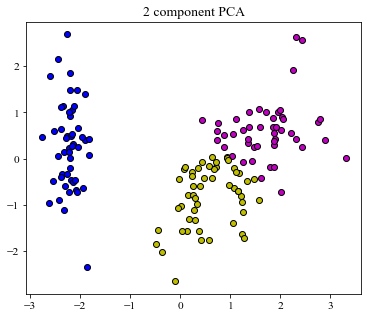

Variance ratio: [0.72962445 0.22850762]


In [9]:
# PCA start
pca = PCA(n_components = 2)
pca.fit(DataSet)

# plot graph
finish = pca.transform(DataSet)
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(finish)

plt.figure(figsize=(6,5))
for i in range(len(finish)):
    plt.scatter(finish[i,0],finish[i,1],c=color[kmeans3.labels_[i]],edgecolor='black')
plt.title('2 component PCA')

plt.show()
print('Variance ratio:',pca.explained_variance_ratio_)
### ----- Data science LAB END ----- ###